In [1]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
# Load the dataset (modify file path accordingly)
file_path = "Cours_titres.xlsx"
df = pd.read_excel(file_path, index_col=0, parse_dates=True)

# Handle missing values by forward-filling and back-filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

returns = df.pct_change().dropna()

In [3]:
returns

,ABJC,BICC,BNBC,BOAB,BOABF,BOAC,BOAM,BOAN,BOAS,CABC,...,SNTS,SOGC,SPHC,STAC,STBC,SVOC,TTLC,TTLS,UNLC,UNXC
Date/Société,,,,,,,,,,,,,,,,,,,,,
2013-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018182,...,0.035714,0.000000,-0.002500,0.000000,-0.000230,0.00000,0.010870,0.000000,0.000000,0.000000
2013-01-04,0.000000,0.002732,0.000000,0.000000,0.004545,0.014065,0.000000,0.000000,0.000000,0.000000,...,0.017241,0.000000,-0.047619,0.000000,0.005978,0.00000,0.000000,0.000000,0.000000,0.000000
2013-01-07,0.000000,0.008174,0.000000,0.000000,0.000000,0.012483,0.000000,0.000000,0.000000,0.000000,...,0.006780,0.000000,0.026316,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2013-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,-0.026027,0.000000,-0.005102,0.000000,0.000000,...,-0.003367,-0.015385,0.000000,0.000000,-0.005714,0.00000,0.000000,0.000000,0.000000,0.000000
2013-01-09,0.000000,0.000000,-0.040000,0.000000,0.000000,0.046414,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000256,0.000000,0.000000,0.00125,0.005376,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12,0.027778,-0.002813,-0.060465,0.011905,0.000000,0.000000,-0.009412,0.001669,0.000000,-0.012500,...,-0.001961,0.000000,-0.001124,0.067669,0.041146,0.00000,0.001389,0.000000,0.000000,-0.012048
2025-03-13,-0.027027,-0.003135,0.054455,-0.023529,-0.001159,-0.003509,0.011876,0.013333,0.031818,-0.029536,...,-0.017682,-0.053030,-0.001125,-0.014085,-0.001001,0.00000,-0.015257,0.038298,0.074903,0.012195
2025-03-14,0.000000,0.003145,0.000000,0.012048,0.009281,0.003521,0.000000,-0.042763,0.000000,0.073913,...,0.000000,0.040000,0.013514,-0.007143,-0.000501,0.00000,0.028169,0.000000,0.005747,0.000000


### 1.1 HMM with decay weight

Model is not converging.  Current: 877832.0956922846 is not greater than 942169.8775555267. Delta is -64337.78186324204


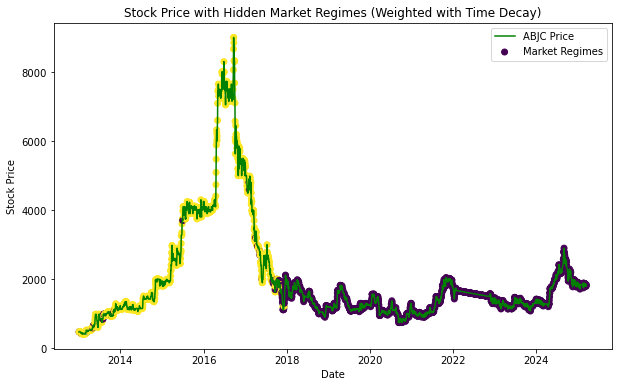

,Top 10 stocks for Neutral Regime:
NEIC,0.002041
STAC,0.001104
NTLC,0.001080
SMBC,0.001002
BICC,0.000830
BOAC,0.000781
CABC,0.000754
STBC,0.000753
CFAC,0.000748
BOAS,0.000738


,Top 10 stocks for Bear Regime:
BOABF,0.082645
SMBC,0.074889
SEMC,0.074783
SAFC,0.074286
CFAC,0.067194
BOAB,0.035088
SOGC,0.015625
SVOC,0.009070
SPHC,0.008931
UNXC,0.000000


,Top 10 stocks for Neutral Regime:
UNXC,0.003115
ABJC,0.001565
FTSC,0.001531
BOAC,0.001441
BOABF,0.001283
PRSC,0.001249
SDSC,0.001222
SGBC,0.001197
SHEC,0.001183
TTLC,0.001164


In [7]:

def hmm_decay(df):
    # Step 1: Load stock data (daily closing prices of all BRVM stocks over 10 years)
    #df = pd.read_excel('brvm_stocks_10y.xlsx', index_col='Date')

    # Step 2: Calculate daily returns for each stock

    # Step 3: Apply exponentially decaying weights (more emphasis on recent data)
    # Using a simple exponential decay function
    time_decay = np.exp(-np.linspace(0, 10, len(returns)))

    # We need to apply these weights to the returns of all stocks (for all rows)
    weighted_returns = returns.values * time_decay.reshape(-1, 1)

    # Step 4: Fit Gaussian Mixture Model (GMM) to identify the mixture components
    # We use GaussianMixture for clustering the returns into regimes
    gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10)
    gmm.fit(weighted_returns)

    # Predict the regimes using GMM
    gmm_regimes = gmm.predict(weighted_returns)

    # Step 5: Fit a Hidden Markov Model (HMM) to the weighted returns
    hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
    hmm_model.fit(weighted_returns)

    # Predict hidden states (regimes) using HMM
    hmm_hidden_states = hmm_model.predict(weighted_returns)

    # Step 6: Visualize the stock price with hidden states (market regimes)
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['ABJC'], label='ABJC Price', color='green')  # Example for Stock 1
    plt.scatter(df.index, df['ABJC'], c=[0]+list(hmm_hidden_states), cmap='viridis', label='Market Regimes')
    plt.title('Stock Price with Hidden Market Regimes (Weighted with Time Decay)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    return hmm_model, hmm_hidden_states
    
def list_of_top_stock(df):
    # Step 6: List the top 10 stocks for each regime based on their mean return during the regime
    # For each regime, calculate the mean return per stock
    hmm_model, hmm_hidden_states = hmm_decay(df)
    stocks = returns.columns
    top_stocks_by_regime = {}
    regime_names = {}

    for regime in range(hmm_model.n_components):
        # Identify which rows belong to the current regime
        regime_indices = np.where(hmm_hidden_states == regime)[0]

        # Calculate the mean return for each stock during the current regime
        regime_returns = returns.iloc[regime_indices]
        mean_returns = regime_returns.mean(axis=0)

        # Sort the stocks by mean return for the current regime and select top 10
        top_stocks = mean_returns.sort_values(ascending=False).head(10)

        # Store the top 10 stocks for the current regime
        top_stocks_by_regime[regime] = top_stocks

        # Name the regime based on the average return of the regime
        avg_return = mean_returns.mean()
        if avg_return > 0.002:
            regime_names[regime] = "Bull"
        elif avg_return < 0:
            regime_names[regime] = "Bear"
        else:
            regime_names[regime] = "Neutral"

    # Print the top 10 stocks for each regime with regime names
    for regime, top_stocks in top_stocks_by_regime.items():
        #print()
        display(pd.DataFrame(top_stocks, columns=[f"Top 10 stocks for {regime_names[regime]} Regime:"]))
        print("\n")


# Print regime details (mean and covariance for each regime)
'''for i in range(hmm_model.n_components):
    print(f"Regime {i}:")
    print(f"Mean returns: {hmm_model.means_[i]}")
    print(f"Covariance: {hmm_model.covars_[i]}")'''

list_of_top_stock(df)

### 1.2 Advence selection

In [9]:

# Step 3: Compute rolling volatility to normalize returns
rolling_vol = returns.rolling(window=30, min_periods=5).std()

# Step 4: Apply exponentially decaying weights (recent data matters more)
time_decay = np.exp(-np.linspace(0, 5, len(returns)))  # Shorter decay horizon
weighted_returns = (returns / rolling_vol).fillna(0).values * time_decay.reshape(-1, 1)

# Step 5: Fit a Gaussian Mixture Model (GMM) to detect regimes
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10)
gmm.fit(weighted_returns)
gmm_regimes = gmm.predict(weighted_returns)

# Step 6: Fit a Hidden Markov Model (HMM) on weighted returns
hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
hmm_model.fit(weighted_returns)
hmm_hidden_states = hmm_model.predict(weighted_returns)

# Step 7: Define Regime Names based on Average Returns & Volatility
regime_names = {}
top_stocks_by_regime = {}
momentum_scores = {}

for regime in range(hmm_model.n_components):
    # Identify periods belonging to the current regime
    regime_indices = np.where(hmm_hidden_states == regime)[0]
    
    # Compute mean return and volatility for the regime
    regime_returns = returns.iloc[regime_indices]
    mean_returns = regime_returns.mean()
    mean_volatility = rolling_vol.iloc[regime_indices].mean()
    
    # Compute a regime Sharpe-like metric (return/volatility)
    regime_sharpe = (mean_returns / mean_volatility).fillna(0)
    
    # Rank stocks based on Sharpe-like measure and select top 10
    top_stocks = regime_sharpe.sort_values(ascending=False).head(10)
    
    # Assign regime names based on mean return & volatility
    avg_return = mean_returns.mean()
    avg_vol = mean_volatility.mean()
    
    if avg_return > 0 and avg_vol < 0.02:  # Low vol, steady gains
        regime_names[regime] = "Stable Bull"
    elif avg_return > 0 and avg_vol >= 0.02:  # High vol, big gains
        regime_names[regime] = "Speculative Bull"
    elif avg_return < 0 and avg_vol >= 0.02:  # High vol, big losses
        regime_names[regime] = "Bear Market"
    else:
        regime_names[regime] = "Neutral/Sideways"
    
    # Compute a momentum score: If a regime is persisting, it's more likely to continue
    recent_occurrences = (hmm_hidden_states[-30:] == regime).sum()  # Last 30 days
    total_occurrences = (hmm_hidden_states == regime).sum()
    momentum_scores[regime] = recent_occurrences / total_occurrences  # Likelihood of persistence
    
    # Store results
    top_stocks_by_regime[regime] = top_stocks

# Step 8: Print Summary
for regime, top_stocks in top_stocks_by_regime.items():
    display(pd.DataFrame(top_stocks, columns=[f"**Regime: {regime_names[regime]}** (Momentum Score: {momentum_scores[regime]:.2f})"]))

Stock_plot = "ABJC"
# Step 9: Plot Regime-Dependent Stock Behavior
#plt.figure(figsize=(10, 6))
#plt.plot(df.index, df[Stock_plot], label='Stock_plot Price', color='blue')  # Example for Stock 1
#plt.scatter(df.index, df[Stock_plot], c=abs(len(df.index)-len(hmm_hidden_states))*[0] + list(hmm_hidden_states), cmap='viridis', label='Market Regimes')
#plt.title('Stock Price with Hidden Market Regimes (Volatility-Adjusted)')
#plt.xlabel('Date')
#plt.ylabel('Stock Price')
#plt.legend()
#plt.show()


,**Regime: Speculative Bull** (Momentum Score: 0.01)
ORAC,0.062384
BOAC,0.052510
STAC,0.045599
NEIC,0.044262
BOABF,0.039285
CBIBF,0.039071
NTLC,0.038041
SIBC,0.037267
BOAB,0.036795
SGBC,0.035491


,**Regime: Neutral/Sideways** (Momentum Score: 0.00)
SNTS,799.740886
NTLC,332.305913
TTLS,244.520158
SOGC,193.368634
SICC,41.641553
UNLC,40.938344
PALC,31.367122
SPHC,4.049683
SDCC,3.381500
SCRC,2.182527


,**Regime: Neutral/Sideways** (Momentum Score: 0.00)
NTLC,341.074895
TTLS,253.294638
SOGC,202.148595
UNLC,45.752577
SICC,35.157052
PALC,32.403552
SNTS,11.127309
SPHC,4.576976
SDCC,3.584996
SCRC,2.737496


### 1.1 Potential return with selected stocks

In [10]:
# Compute rolling returns for different investment horizons
horizons = {'1M': 21, '3M': 63, '1Y': 252}  # Approximate trading days in each period

expected_returns = {}

for horizon_name, horizon_days in horizons.items():
    horizon_returns = df.pct_change(horizon_days).dropna()  # Compute horizon-based returns
    
    for regime, top_stocks in top_stocks_by_regime.items():
        regime_indices = np.where(hmm_hidden_states[:-horizon_days] == regime)[0]  # Regime occurrences
        
        # Compute average future return of stocks in this regime
        future_returns = horizon_returns.iloc[regime_indices]
        mean_future_returns = future_returns.mean()  # Expected return per stock
        
        # Adjust using momentum score (if high, future regime is likely to persist)
        weighted_returns = mean_future_returns * momentum_scores[regime]
        
        # Store results
        expected_returns[(regime_names[regime], horizon_name)] = weighted_returns.sort_values(ascending=False)

# Print results
for (regime, horizon), returns in expected_returns.items():
    display(pd.DataFrame(returns, columns=[f"**Expected Returns for Regime: {regime} ({horizon})**"]).head())  # Show top 10 stocks


,**Expected Returns for Regime: Speculative Bull (1M)**
NEIC,0.000505
NTLC,0.000295
STAC,0.000280
BOAC,0.000247
UNXC,0.000233


,**Expected Returns for Regime: Neutral/Sideways (1M)**
ABJC,-0.0
SLBC,-0.0
SCRC,0.0
SDCC,0.0
SDSC,-0.0


,**Expected Returns for Regime: Speculative Bull (3M)**
NEIC,0.002313
NTLC,0.001105
UNXC,0.000889
STAC,0.000872
ABJC,0.000729


,**Expected Returns for Regime: Neutral/Sideways (3M)**
ABJC,-0.0
SLBC,-0.0
SCRC,-0.0
SDCC,0.0
SDSC,-0.0


,**Expected Returns for Regime: Speculative Bull (1Y)**
NTLC,0.010398
NEIC,0.006371
STBC,0.006050
STAC,0.004135
UNXC,0.003886


,**Expected Returns for Regime: Neutral/Sideways (1Y)**
ABJC,-0.0
SLBC,-0.0
SCRC,-0.0
SDCC,0.0
SDSC,-0.0


In [11]:

# Create a dictionary to store expected returns in a structured format
data = {}

for (regime, horizon), returns in expected_returns.items():
    data[(regime, horizon)] = returns

# Convert dictionary to DataFrame
df_expected_returns = pd.DataFrame(data)

# Display the structured data
display(df_expected_returns.head(10))


,Speculative Bull,Neutral/Sideways,Speculative Bull,Neutral/Sideways,Speculative Bull,Neutral/Sideways
,1M,1M,3M,3M,1Y,1Y
ABJC,0.000233,-0.0,0.000729,-0.0,0.003053,-0.0
BICC,0.000167,0.0,0.000484,-0.0,0.001390,0.0
BNBC,0.000053,-0.0,0.000131,-0.0,0.001357,-0.0
BOAB,0.000156,-0.0,0.000426,-0.0,0.001815,0.0
BOABF,0.000160,-0.0,0.000410,-0.0,0.001145,0.0
BOAC,0.000247,-0.0,0.000710,-0.0,0.002371,0.0
BOAM,0.000091,-0.0,0.000243,-0.0,0.000720,-0.0
BOAN,0.000082,-0.0,0.000221,-0.0,0.000990,-0.0
BOAS,0.000142,-0.0,0.000432,-0.0,0.001794,0.0


### 2. Backtesting

In [24]:
def backtesting(stocks_selected, returns):
    # === Step 1: Load Data ===
    # === Step 2: Create Regime-Based Portfolios ===
    portfolio_returns = {}

    for regime, stocks in stocks_selected.items():
        # Select stocks from the corresponding regime
        selected_returns = returns[stocks].mean(axis=1)  # Equal weight
        # print(selected_returns)
        portfolio_returns[regime] = selected_returns

    # Convert to DataFrame
    portfolio_df = pd.DataFrame(portfolio_returns)

    # === Step 3: Compute Performance Metrics ===
    def performance_metrics(p_returns):
        cagr = (1 + p_returns.mean())**252 - 1  # Annualized return
        # print(p_returns.mean())
        volatility = p_returns.std() * np.sqrt(252)  # Annualized volatility
        sharpe = cagr / volatility  # Sharpe ratio
        max_drawdown = (p_returns.cumsum() - p_returns.cumsum().cummax()).min()  # Worst drop
        return cagr, sharpe, volatility, max_drawdown

    metrics = {regime: performance_metrics(portfolio_df[regime]) for regime in portfolio_df.columns}

    # === Step 4: Compare Against Benchmark ===
    benchmark = returns.mean(axis=1)  # Simple average of all stocks (BRVM index proxy)
    benchmark_metrics = performance_metrics(benchmark)

    # === Step 5: Display Results ===
    print("\n📊 **Backtest Results**")
    print(f"{'Regime':<20}{'CAGR':<15}{'Sharpe':<15}{'Volatility':<15}{'Max Drawdown':<15}")

    for regime, values in metrics.items():
        print(f"{regime:<20}{values[0]:<15.2%}{values[1]:<15.2f}{values[2]:<15.2%}{values[3]:<15.2%}")

    print("\n📈 **Benchmark (BRVM Index) Performance**")
    print(f"CAGR: {benchmark_metrics[0]:.2%} | Sharpe: {benchmark_metrics[1]:.2f} | Volatility: {benchmark_metrics[2]:.2%} | Max Drawdown: {benchmark_metrics[3]:.2%}")


### 3. Adding new factors to improve selection

In [44]:
def main(f_load_data, f_pca, f_hmm_model, f_get_top_stocks_per_regime):
    # Load the dataset (modify file path accordingly)
    file_path = "Cours_titres.xlsx"
    stock_df = pd.read_excel(file_path, index_col=0, parse_dates=True)#.iloc[1000:]

    # Handle missing values by forward-filling and back-filling
    stock_df.fillna(method='ffill', inplace=True)
    stock_df.fillna(method='bfill', inplace=True)
    stocks_returns = stock_df.pct_change().dropna()

    factors = f_load_data(stock_df, fill_na=True)
    factors = factors.dropna(axis=1, thresh=int(0.75 * len(factors)))  # Keep only stocks with 75%+ valid data
    factors = factors.fillna(factors.median())  # Fill remaining NaNs with median
    #factors = factors.rolling(63, min_periods=10).apply(lambda x: (x - x.mean()) / x.std(), raw=True)

    pca_df, pca_model = f_pca(factors)
    # print(pca_df)
    pca_predict = f_hmm_model(pca_df, n_components=3, n_iter=1000)
    # === Step 7: Display Results ===
    stocks_selected = {}
    stocks_selected = f_get_top_stocks_per_regime(pca_predict, nb_per_regime=8)
    display(pd.DataFrame(stocks_selected))
    return {"pca df": pca_df, "stock selected": stocks_selected, "pca model": pca_model,
            "hmm model" : pca_predict, "factors": factors, "all stock": stock_df, "all stock return": stocks_returns}

In [16]:
def load_data(df=None, fill_na=True):
    # === Step 1: Load Data (Assuming a CSV file with Date as index and stock symbols as columns) ===
    df = pd.read_excel("Cours_titres.xlsx", index_col=0, parse_dates=True) if df is None else df

    # === Step 2: Compute Factors ===
    returns = df.pct_change().dropna()
    # Factor 1: Momentum (Recent returns: 1M, 3M, 6M)
    momentum_1M = returns.rolling(21).mean().fillna(0) if fill_na else returns.rolling(21).mean()
    momentum_3M = returns.rolling(63).mean().fillna(0) if fill_na else returns.rolling(63).mean()
    momentum_6M = returns.rolling(126).mean().fillna(0) if fill_na else returns.rolling(126).mean()

    # Factor 2: Volatility (Rolling standard deviation)
    volatility = returns.rolling(21).std().fillna(0) if fill_na else returns.rolling(21).std()

    # Factor 3: Mean Reversion (Z-score of returns)
    mean_reversion = returns.apply(zscore).fillna(0) if fill_na else returns.apply(zscore)

    # Factor 4: Liquidity (Turnover proxy: absolute returns)
    liquidity = returns.abs().rolling(21).sum().fillna(0) if fill_na else returns.abs().rolling(21).sum()


    # Combine factors into a single DataFrame
    factors = pd.concat([momentum_1M, momentum_3M, momentum_6M, volatility, mean_reversion, liquidity], axis=1)
    return factors.dropna()


def pca_model(factor_data, n_components=2):
    # === Step 3: PCA for Factor Weighting ===
    pca_names = ['PC'+ str(i) for i in range(n_components)]
    pca = PCA(n_components=n_components)
    pca_scores = pca.fit_transform(factor_data.T)  # Each stock now has 2 PCA components

    # Convert PCA results to DataFrame, preserving stock names
    stock_names = factor_data.columns  
    pca_df = pd.DataFrame(pca_scores, index=stock_names, columns=pca_names)
    #print(pca_df)
    return pca_df, pca_scores


def hmm_model(pca_df, n_components=3, n_iter=1000):
    # === Step 4: Apply HMM for Regime Detection ===
    pca_names = pca_df.columns
    hmm = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    hmm.fit(pca_df)
    res = pca_df.copy()
    # Predict regimes per stock
    res['Regime'] = hmm.predict(res[pca_names])
    return res

def get_top_stocks_per_regime(pca_df_pred, nb_per_regime=10, pca_rank=0):
    # === Step 5: Assign Meaningful Names to Regimes ===
    # Define mapping (this can be adjusted based on actual analysis)
    regime_labels = {0: "Bull Market", 1: "Bear Market", 2: "Neutral/Sideways"}
    pca_df_pred['Regime Name'] = pca_df_pred['Regime'].map(regime_labels)

    # === Step 6: Identify Top 10 Stocks Per Regime (Fixed) ===
    top_stocks_per_regime = {}
    for regime, label in regime_labels.items():
        regime_data = pca_df_pred[pca_df_pred['Regime'] == regime]  # Stocks in this regime
        # display(regime_data)
        top_10_stocks = regime_data.nlargest(nb_per_regime, 'PC' + str(pca_rank)).index.tolist()  # Take best PCA scores
        top_stocks_per_regime[label] = top_10_stocks
    return top_stocks_per_regime


In [17]:
output1 = main(load_data, pca_model, hmm_model, get_top_stocks_per_regime)

,Bull Market,Bear Market,Neutral/Sideways
0,FTSC,FTSC,SICC
1,ABJC,ABJC,LNBB
2,UNXC,UNXC,ORAC
3,TTLC,TTLC,SAFC
4,SHEC,SHEC,STAC
5,SDSC,PALC,NEIC
6,CABC,CIEC,SPHC
7,PALC,SDSC,SVOC


In [25]:
backtesting(output1["stock selected"], output1["all stock return"])


📊 **Backtest Results**
Regime              CAGR           Sharpe         Volatility     Max Drawdown   
Bull Market         16.75%         0.91           18.48%         -116.24%       
Bear Market         17.03%         0.91           18.67%         -112.74%       
Neutral/Sideways    9.93%          0.81           12.26%         -52.25%        

📈 **Benchmark (BRVM Index) Performance**
CAGR: 11.03% | Sharpe: 1.45 | Volatility: 7.63% | Max Drawdown: -84.88%


### Above code not concluant, let improve each steps

In [32]:
from sklearn.preprocessing import StandardScaler
def load_data2(df=None, fill_na=True):
    """ Load and preprocess stock price data, compute factors with recency bias """
    df = pd.read_excel("Cours_titres.xlsx", index_col=0, parse_dates=True) if df is None else df
    returns = df.pct_change().dropna()
    
    # Recency-weighted momentum (Exponential moving averages)
    momentum_1M = returns.ewm(span=21).mean()
    momentum_3M = returns.ewm(span=63).mean()
    momentum_6M = returns.ewm(span=126).mean()

    # Volatility: Exponential moving std deviation
    volatility = returns.ewm(span=21).std()
    #display(returns.rolling(63))
    
    # Liquidity Proxy (Rolling sum of absolute returns)
    liquidity = returns.abs().rolling(21).sum()
    
    # Mean Reversion (Z-score over rolling 3M window)
    mean_reversion = returns.apply(zscore)#, raw=True)


    # Combine factors
    factors = pd.concat([momentum_1M, momentum_3M, momentum_6M, volatility, mean_reversion, liquidity], axis=1)
    return factors.dropna()

def pca_model2(factor_data, variance_threshold=0.95):
    """ Apply PCA, keeping components that explain threshold variance """
    scaler = StandardScaler()
    factor_data_scaled = scaler.fit_transform(factor_data.T)  # Stocks as rows
    
    pca = PCA()
    pca_scores = pca.fit_transform(factor_data_scaled)
    
    # Select enough components to explain given variance threshold
    total_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(total_variance >= variance_threshold) + 1
    
    pca_final = PCA(n_components=n_components)
    pca_scores = pca_final.fit_transform(factor_data_scaled)
    
    stock_names = factor_data.columns  
    pca_df = pd.DataFrame(pca_scores, index=stock_names, columns=[f"PC{i+1}" for i in range(n_components)])
    return pca_df, pca

def hmm_model2(pca_df, n_components=3, n_iter=1000):
    """ Apply Gaussian HMM with time-awareness (moving averages for stability) """
    hmm = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    
    # Time-smoothing (Exponential moving average on PCA factors)
    pca_smoothed = pca_df.ewm(span=5).mean()
    hmm.fit(pca_smoothed)
    
    pca_df['Regime'] = hmm.predict(pca_smoothed)
    return pca_df

def name_regimes2(pca_df):
    """ Dynamically name regimes based on PCA mean and volatility """
    regime_stats = pca_df.groupby("Regime").mean()
    
    # Rank regimes based on first principal component mean (high -> Bull, low -> Bear)
    ranked_regimes = regime_stats["PC1"].rank().astype(int) - 1  # 0 = Bear, 1 = Neutral, 2 = Bull
    
    regime_labels = {ranked_regimes[i]: name for i, name in enumerate(["Bear Market", "Neutral", "Bull Market"])}
    pca_df["Regime Name"] = pca_df["Regime"].map(regime_labels)
    
    return pca_df

def get_top_stocks_per_regime2(pca_df, nb_per_regime=10):
    """ Select top stocks per regime based on PCA and adjusted volatility ranking """
    top_stocks_per_regime = {}
    pca_df = name_regimes2(pca_df)
    for regime_name in pca_df["Regime Name"].unique():
        regime_data = pca_df[pca_df["Regime Name"] == regime_name]
        
        # Rank stocks by best PCA performance adjusted for volatility
        adjusted_rank = regime_data["PC1"] / (regime_data["PC2"].abs() + 1e-6)  # Avoid div by zero
        top_10_stocks = adjusted_rank.nlargest(nb_per_regime).index.tolist()
        
        top_stocks_per_regime[regime_name] = top_10_stocks

    return top_stocks_per_regime


In [46]:
output2 = main(load_data2, pca_model2, hmm_model2, get_top_stocks_per_regime2)

,Neutral,Bear Market,Bull Market
0,FTSC,BOAB,NSBC
1,ABJC,BOABF,BOAM
2,CABC,BICC,SAFC
3,ETIT,BNBC,ECOC
4,UNXC,ABJC,SNTS
5,SHEC,FTSC,ORGT
6,SIVC,BOAN,SICC
7,CIEC,TTLC,SCRC


In [36]:
backtesting(output2["stock selected"], output2["all stock return"])


📊 **Backtest Results**
Regime              CAGR           Sharpe         Volatility     Max Drawdown   
Neutral             14.25%         0.80           17.81%         -118.02%       
Bear Market         17.25%         1.07           16.15%         -106.71%       
Bull Market         5.03%          0.40           12.44%         -87.81%        

📈 **Benchmark (BRVM Index) Performance**
CAGR: 11.03% | Sharpe: 1.45 | Volatility: 7.63% | Max Drawdown: -84.88%


### Debug

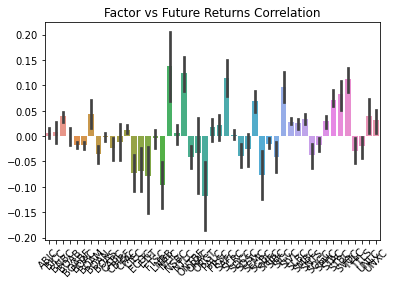

NEIC    0.259731
NEIC    0.228921
SAFC    0.194855
NTLC    0.189816
NEIC    0.164645
          ...   
SGBC   -0.176199
ORGT   -0.191941
ORGT   -0.198184
ORAC   -0.209463
ETIT   -0.228010
Length: 282, dtype: float64


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_factors_correlation(factors, returns):
    """ Check if factors have predictive power on returns """
    factor_corr = factors.corrwith(returns.shift(-1))  # Future returns correlation
    sns.barplot(x=factor_corr.index, y=factor_corr.values)
    plt.xticks(rotation=45)
    plt.title("Factor vs Future Returns Correlation")
    plt.show()
    return factor_corr

factor_corr = check_factors_correlation(output2["factors"], output2["all stock return"])
print(factor_corr.sort_values(ascending=False))  # Are momentum, volatility meaningful?


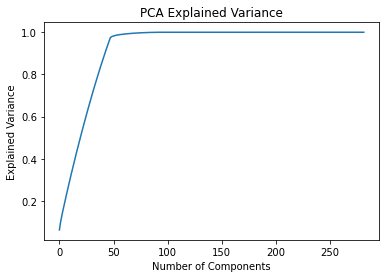

In [38]:
def check_pca_effectiveness(pca_model):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title('PCA Explained Variance')
    plt.show()

pca = PCA().fit(output2["factors"].T)
check_pca_effectiveness(pca)


C:\Users\charl\AppData\Local\Temp\ipykernel_40540\3676088898.py:8: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Regime Name'], dtype='object')
  hmm = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000).fit(output2["pca df"].ewm(span=5).mean())


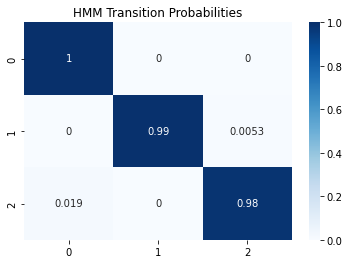

array([[1.        , 0.        , 0.        ],
       [0.        , 0.99468085, 0.00531915],
       [0.01923077, 0.        , 0.98076923]])

In [47]:
def check_hmm_stability(hmm_model):
    trans_matrix = hmm.transmat_
    sns.heatmap(trans_matrix, annot=True, cmap="Blues")
    plt.title("HMM Transition Probabilities")
    plt.show()
    return trans_matrix

hmm = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000).fit(output2["pca df"].ewm(span=5).mean())
check_hmm_stability(output2["hmm model"])


### New approch with Elastic net

In [51]:
from sklearn.linear_model import ElasticNetCV

def load_data(df=None, fill_na=True):
    df = pd.read_excel("Cours_titres.xlsx", index_col=0, parse_dates=True) if df is None else df
    returns = df.pct_change().dropna()

    # === Compute Factors ===
    factors = {
        "Momentum_1M": returns.rolling(21).mean(),
        "Momentum_3M": returns.rolling(63).mean(),
        "Momentum_6M": returns.rolling(126).mean(),
        "Volatility": returns.rolling(21).std(),
        "MeanReversion": returns.apply(zscore),
        "Liquidity": returns.abs().rolling(21).sum(),
    }

    # Combine factors into DataFrame
    factor_df = pd.concat(factors, axis=1).dropna()
    
    # === Future Returns (Target) ===
    future_returns = returns.shift(-21).reindex(factor_df.index)  # 1-month forward return

    # === Factor Selection using Elastic Net ===
    valid_stocks = factor_df.columns.get_level_values(1).unique()  # Get unique stock names
    factor_weights = {}

    for stock in valid_stocks:
        X = factor_df.xs(stock, level=1, axis=1).dropna()
        y = future_returns[stock].dropna()
        X, y = X.align(y, axis=0, join='inner')  # Ensure alignment

        if len(y) > 30:  # Avoid overfitting on small samples
            model = ElasticNetCV(cv=5, random_state=42).fit(X, y)
            factor_weights[stock] = model.coef_  # Store factor weights

    # Convert weights to DataFrame
    factor_weights_df = pd.DataFrame(factor_weights, index=factors.keys()).T
    return factor_weights_df


def rank_stocks_by_factors(factor_weights_df, factor_data):
    # Multiply factor values by their corresponding stock-specific weights
    weighted_factors = factor_data.mul(factor_weights_df, axis=1, level=1)
    
    # Compute final stock scores (sum across factors)
    stock_scores = weighted_factors.sum(axis=1, level=1)

    # Rank stocks (higher score = better)
    ranked_stocks = stock_scores.rank(axis=1, ascending=False, method='first')
    
    return ranked_stocks

def assign_regimes(stock_scores, n_components=3):
    hmm = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
    hmm.fit(stock_scores)

    # Predict regimes per stock
    regimes = pd.DataFrame(hmm.predict(stock_scores), index=stock_scores.index, columns=['Regime'])
    
    # Map regimes to labels
    regime_mapping = {0: "Bull Market", 1: "Bear Market", 2: "Neutral"}
    regimes['Regime Name'] = regimes['Regime'].map(regime_mapping)

    return regimes

def construct_portfolio(stock_scores, regimes, top_n=10):
    portfolios = {}
    
    for regime in ["Bull Market", "Bear Market", "Neutral"]:
        # Filter stocks in the current regime
        regime_stocks = stock_scores[regimes['Regime Name'] == regime]
        
        if not regime_stocks.empty:
            # Select the top `n` stocks in this regime
            top_stocks = regime_stocks.mean().nlargest(top_n).index.tolist()
            portfolios[regime] = top_stocks

    return portfolios


In [52]:
def backtest_portfolios(portfolios, returns, initial_capital=1000000):
    results = {}

    for regime, stocks in portfolios.items():
        if not stocks:
            continue  # Skip empty portfolios

        # Equal weight allocation
        weights = np.ones(len(stocks)) / len(stocks)

        # Compute portfolio returns
        regime_returns = returns[stocks].mean(axis=1)  # Simple equal-weighted approach
        portfolio_cum_returns = (1 + regime_returns).cumprod() * initial_capital

        # Compute performance metrics
        cagr = (portfolio_cum_returns.iloc[-1] / initial_capital) ** (1 / (len(portfolio_cum_returns) / 252)) - 1
        sharpe = regime_returns.mean() / regime_returns.std() * np.sqrt(252)
        volatility = regime_returns.std() * np.sqrt(252)
        max_drawdown = (portfolio_cum_returns / portfolio_cum_returns.cummax() - 1).min()

        results[regime] = {
            "CAGR": f"{cagr:.2%}",
            "Sharpe": f"{sharpe:.2f}",
            "Volatility": f"{volatility:.2%}",
            "Max Drawdown": f"{max_drawdown:.2%}",
        }

    return results


In [55]:
if __name__ == "__main__":
    # Load Data
    factor_data = load_data()

    # Rank stocks based on factor exposures
    ranked_stocks = rank_stocks_by_factors(factor_data)

    # Apply PCA after ranking (keeping stock names)
    pca_df = pca(factor_data)
    pca_df.index = factor_data.columns  # Restore stock names after PCA transformation

    # Fit HMM Model on PCA-reduced data
    pca_df_pred = hmm_model(pca_df)

    # Assign regimes to ranked stocks
    pca_df_pred = assign_regimes(pca_df_pred, ranked_stocks)

    # Construct Portfolio by selecting top-ranked stocks per regime
    portfolios = construct_portfolio(pca_df_pred)

    # Backtest the strategy
    results = backtest_portfolios(portfolios)

    # Print Performance Results
    for regime, stats in results.items():
        print(f"📊 **{regime} Portfolio Performance**")
        for metric, value in stats.items():
            print(f"{metric}: {value}")
        print("\n")


TypeError: rank_stocks_by_factors() missing 1 required positional argument: 'factor_data'